In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/investment/rounds2.csv
/kaggle/input/investment/companies.csv
/kaggle/input/investment/mapping.csv


Reading input files after inspecting encoding iso-8859-1 can be used for these files

In [2]:
companies=pd.read_csv('../input/investment/companies.csv',encoding='iso-8859-1')
rounds2=pd.read_csv('../input/investment/rounds2.csv',encoding='iso-8859-1')

Analyzing 'rounds2' file for columns/data present

In [3]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


Converting 'comapany_permalink' column to a single case (converting it to lower case) and counting unique company names with the help of 'Unique ID of company' that is 'company_permalink' column

In [4]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
rounds2_name=rounds2['company_permalink'].unique()
print(len(rounds2_name))

66370


Analyzing 'companies' file for columns/data present

In [5]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


Converting 'permalink' column to a single case (converting it to lower case) counting unique company names with the help of 'Unique ID of company' that is 'permalink' column

In [6]:
companies['permalink']=companies['permalink'].str.lower()
company_name=companies['permalink'].unique()
print(len(company_name))

66368


Checking company names present in 'rounds2' but not present in 'companies' file.

Converting both numpy object to series as they both are of different shape subtracting will not give us the result.

In [7]:
company_name=pd.Series(company_name)
rounds2_name=pd.Series(rounds2_name)
extra_comp = ~rounds2_name.isin(company_name)
print(sum(extra_comp))

7


Removing duplicates from both 'companies' and 'rounds2' dataframe before merging them

In [8]:
companies=companies.drop_duplicates(subset=['permalink'], keep='first', inplace=False)
rounds2=rounds2.drop_duplicates(subset=['company_permalink'], keep='first', inplace=False)
print(companies.shape)
print(rounds2.shape)

(66368, 10)
(66370, 6)


No duplicates present according to 'unique id' of companies can go ahead with merging both dataframes

Merging two dataframes 'companies' and 'rounds2' and all variables to be added to 'rounds2' dataframe

In [9]:
master_frame=pd.merge(rounds2,companies,how='inner',left_on='company_permalink',right_on='permalink')

Analyzing 'master_frame' to see columns/data present

In [10]:
print(master_frame.shape)
master_frame.head()

(66363, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [11]:
master_frame['funding_round_type'].isnull().value_counts()

False    66363
Name: funding_round_type, dtype: int64

Treating missing values in 'raised_amount_usd' column

In [12]:
master_frame=master_frame[~(master_frame['raised_amount_usd'].isnull())]

Analyzing outliers and representative value to be taken for 'raised_amount_usd' column with the help of Inter-Quartile range formula

In [13]:
def outlier_detect(df):
    df=df.sort_values(by='raised_amount_usd',ascending=True)
    Q1=df['raised_amount_usd'].quantile(0.25)
    Q3=df['raised_amount_usd'].quantile(0.75)
    IQR=Q3-Q1
    df_outex=df[(df['raised_amount_usd']<Q3+1.5*IQR) & (df['raised_amount_usd']>Q1-1.5*IQR)]
    per_out=100-(len(df_outex)/len(df))*100
    return per_out

In [14]:
def filter_invest(df_master,key):
    df_invest=df_master[df_master['funding_round_type'].str.lower()==key]
    return df_invest

In [15]:
venture_funds=filter_invest(master_frame,'venture')
angel_funds=filter_invest(master_frame,'angel')
seed_funds=filter_invest(master_frame,'seed')
privateq_funds=filter_invest(master_frame,'private_equity')

Identifying outliers percentage in each investment type

In [16]:
vent_out=outlier_detect(venture_funds)
print('Venutre outlier' ,round(vent_out,2),'%')
angel_out=outlier_detect(angel_funds)
print('Angel outlier',round(angel_out,2), '%')
seed_out=outlier_detect(seed_funds)
print('Seed outlier', round(seed_out,2), '%')
privateq_out=outlier_detect(privateq_funds)
print('Private equity outlier', round(privateq_out,2), '%')

Venutre outlier 9.87 %
Angel outlier 6.63 %
Seed outlier 6.52 %
Private equity outlier 10.42 %


After removing all rows having missing value in 'raised_amount_usd' column still we have outliers for all 4 funding types.
1. Outliers will effect mean value
2. Removing outliers and calculating mean will not be correct as reason for these outliers are not known.

Therefore, taking median as representative value for 'raised_amount_usd'

Analyzing further by taking median as representative value for each of the 4 investment type mentioned in case study

Venture representative value 4250000.0
Angel representative value 375000.0
Seed representative value 250000.0
Private equity representative value 21500000.0


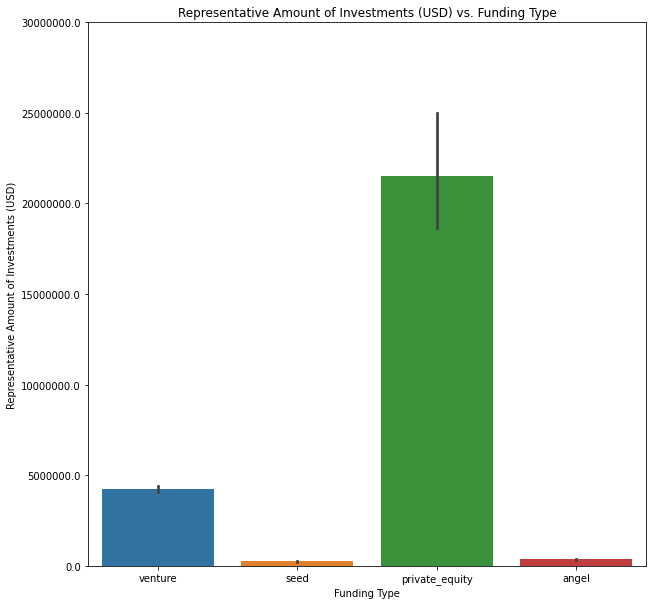

In [17]:
#Taking median as the representative value identifying suitable investment type
venture_rep=venture_funds['raised_amount_usd'].median()
print('Venture representative value',venture_rep)
angel_rep=angel_funds['raised_amount_usd'].median()
print('Angel representative value',angel_rep)
seed_rep=seed_funds['raised_amount_usd'].median()
print('Seed representative value',seed_rep)
private_rep=privateq_funds['raised_amount_usd'].median()
print('Private equity representative value',private_rep)
invest_type=['venture','seed','angel','private_equity']
sub_master=master_frame[master_frame['funding_round_type'].isin(invest_type)]
#barplot for analyzing criteria 1
plt.figure(figsize=(10,10))
fig=sns.barplot(x="funding_round_type", y="raised_amount_usd",data=sub_master, estimator=np.median)
fig.set(xlabel="Funding Type", ylabel = "Representative Amount of Investments (USD)")
plt.title('Representative Amount of Investments (USD) vs. Funding Type')
plt.yticks(fig.get_yticks(),fig.get_yticks())
plt.show()

Filtering dataframe 'master_frame' to get data only for a suitable 'funding_round_type' as per criteria analysis (5-15 million USD)

In [18]:
vent_master=master_frame[master_frame['funding_round_type'].str.lower()=="venture"]
vent_master.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
15,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
18,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013


Analyzing top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [19]:
all_countries=vent_master.groupby('country_code')['raised_amount_usd'].sum()
type(all_countries)
top_countries=all_countries.sort_values(ascending=False)
print(top_countries[0:9])

country_code
USA    1.815192e+11
CHN    1.850758e+10
GBR    1.134263e+10
IND    6.064055e+09
CAN    4.597904e+09
FRA    4.556741e+09
ISR    3.357101e+09
DEU    2.893831e+09
JPN    2.020986e+09
Name: raised_amount_usd, dtype: float64


Filtering dataframe with top 9 countries received the highest total funding

In [20]:
top_9countries=['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN']
top9=vent_master[vent_master['country_code'].isin(top_9countries)]
print(top9.shape)
top9.head()

(20787, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
15,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
18,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
23,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010


Plotting top 9 countries against the total amount of investments of funding type FT, here private equity

Since there is a significant difference between investments, plotting 'total amount of investments' on a log scale

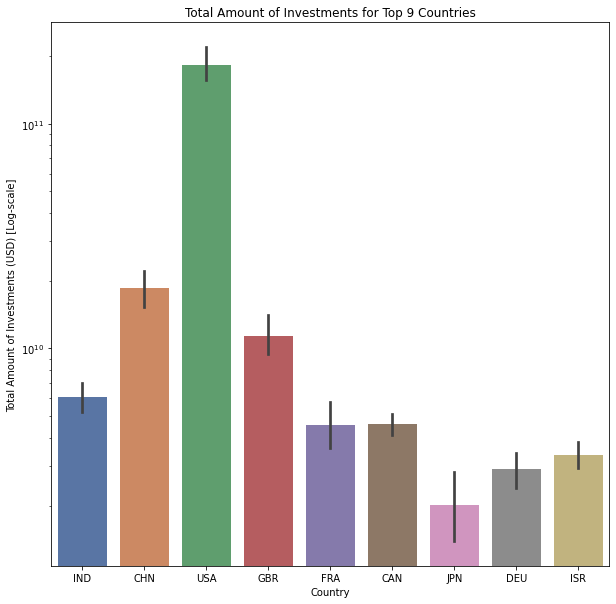

In [21]:
plt.figure(figsize=(10,10))
top9_plot=sns.barplot(x='country_code', y='raised_amount_usd', palette="deep", data=top9, estimator=np.sum)
top9_plot.set(xlabel="Country", ylabel = "Total Amount of Investments (USD) [Log-scale]")
plt.title('Total Amount of Investments for Top 9 Countries')
top9_plot.set_yscale("log")
plt.show()

Filtering dataframe with the first 3 english speaking countries among top 9 countries investment-wise

In [22]:
top3 = top9[(top9.country_code=='USA') | (top9.country_code=='GBR') | (top9.country_code=='IND')]
print(top3.shape)
top3.head(10)

(17766, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
15,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012
18,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,A,09-10-2014,4000000.0,/organization/10-minutes-with,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,01-01-2013
23,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,A,16-02-2011,2520000.0,/organization/1000memories,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,01-07-2010
32,/organization/1010data,/funding-round/482fbf992b48f5c47d0080ab7ec0cb54,venture,NaN,08-03-2010,35000000.0,/organization/1010data,1010data,http://www.1010data.com,Software,acquired,USA,NY,New York City,New York,01-01-2000
40,/organization/10x-genomics,/funding-round/563923487783bdeb5d0b7872f3d6b99a,venture,B,12-01-2015,55000000.0,/organization/10x-genomics,10X Genomics,http://10xgenomics.com,Biotechnology|Technology,operating,USA,CA,SF Bay Area,Pleasanton,01-01-2012
41,/organization/10x-technologies,/funding-round/39c1441d5098875a925577d0f2ad3904,venture,B,12-01-2015,550000.0,/organization/10x-technologies,10X Technologies,http://10xtechnologies.com,Biotechnology,operating,USA,CA,SF Bay Area,Oakland,01-01-2012
47,/organization/11i-solutions,/funding-round/e07501ed6997290b1bef59406bc300a1,venture,NaN,22-03-2011,1800000.0,/organization/11i-solutions,11i Solutions,http://www.11isolutions.com,Enterprise Software,closed,USA,AL,Huntsville,Huntsville,NaN
60,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,venture,NaN,16-12-2014,11999347.0,/organization/128-technology,128 Technology,http://www.128technology.com/,Service Providers|Technology,operating,USA,MA,Boston,Burlington,07-07-2014
65,/organization/1366-technologies,/funding-round/2a31dd8a0b006b341cde0f7b721008e6,venture,B,14-01-2011,2400000.0,/organization/1366-technologies,1366 Technologies,http://www.1366tech.com,Manufacturing,operating,USA,MA,Boston,Bedford,01-01-2007


Reading mapping file

In [23]:
sector_map=pd.read_csv('../input/investment/mapping.csv', encoding='utf-8')
sector_map.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Creating a column as 'primary sector' by extracting string before the first vertical bar '|' in 'category_list'

In [24]:
top3['primary sector']=top3['category_list'].apply(lambda x: str(x).split('|')[0])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Converting wide format data mentioned in 'mapping' file to long format, it will help in merging dataframes

In [25]:
var_val=list(sector_map.columns[1:])
var_id = list(np.setdiff1d(sector_map.columns, var_val))
map_df = pd.melt(sector_map, id_vars=var_id, value_vars=var_val)
map_df

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0
...,...,...,...
6187,Wholesale,"Social, Finance, Analytics, Advertising",0
6188,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6189,Wireless,"Social, Finance, Analytics, Advertising",0
6190,Women,"Social, Finance, Analytics, Advertising",0


Removing rows having 0s coming in the above dataframe and keeping only rows having value 1

In [26]:
map_df=map_df[map_df['value']==1]
map_df=map_df.drop('value',axis=1)
map_df=map_df.rename(columns={'variable': 'main_sector'})
map_df

,category_list,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports
...,...,...
6121,Social Recruiting,"Social, Finance, Analytics, Advertising"
6122,Social Television,"Social, Finance, Analytics, Advertising"
6123,Social Travel,"Social, Finance, Analytics, Advertising"
6134,Stock Exchanges,"Social, Finance, Analytics, Advertising"


Merging 'main_sector' column from mapping dataframe to 'top3' dataframe taking 'category_list' as the key

In [27]:
final_df=top3.merge(map_df)

Checking dataframe after merging 'mapping' dataframe with 'top3'  dataframe

In [28]:
final_df[final_df["main_sector"]=="Automotive & Sports"].head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary sector,main_sector
9038,/organization/acs-athletics,/funding-round/8038397f37e877563428c7082ad1df97,venture,A,01-07-2006,215000.0,/organization/acs-athletics,ACS Athletics,http://www.acsathletics.com/,Sports,operating,USA,TX,Austin,Austin,01-01-1999,Sports,Automotive & Sports
9039,/organization/airkast,/funding-round/24aa27cde61d7fe3e151b51c244f3ef5,venture,NaN,13-06-2011,750000.0,/organization/airkast,AirKast,http://airkast.com,Sports,operating,USA,CA,SF Bay Area,Cupertino,01-01-2007,Sports,Automotive & Sports
9040,/organization/boathouse-row-sports,/funding-round/993fcf3fdfb63ff58981130b6857efc5,venture,NaN,07-08-2009,2843769.0,/organization/boathouse-row-sports,BOATHOUSE ROW SPORTS,http://www.boathouse.com,Sports,operating,USA,PA,Philadelphia,Philadelphia,NaN,Sports,Automotive & Sports
9041,/organization/break30,/funding-round/9f921768edc157dceb1de91c383000d0,venture,NaN,04-12-2008,295000.0,/organization/break30,Break30,http://www.break30.com,Sports,operating,GBR,L9,Sheffield,Sheffield,01-01-2005,Sports,Automotive & Sports
9042,/organization/citizen-sports,/funding-round/7e2b3f5858cc3d9e6b397adade04cc5a,venture,NaN,01-01-2007,10000000.0,/organization/citizen-sports,Citizen Sports,http://www.citizensportsinc.com,Sports,acquired,USA,CA,SF Bay Area,San Francisco,01-01-2005,Sports,Automotive & Sports
